In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 

import tensorflow as tf 


In [3]:
data = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')

In [4]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [5]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [6]:
food_vocab = set()

for ingredients in data['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [7]:
food_vocab

{'all purpose flour',
 'almond',
 'almonds',
 'aloo',
 'alum powder',
 'amaranth leaves',
 'amchur powder',
 'apricots',
 'arbi ke patte',
 'arhar dal',
 'arrowroot powder',
 'atta',
 'avocado oil',
 'axone',
 'baby corn',
 'baby potatoes',
 'badam',
 'baingan',
 'baking powder',
 'baking soda',
 'banana',
 'banana flower',
 'basmati rice',
 'bay leaf',
 'beans',
 'beaten rice flakes',
 'beef',
 'beetroot',
 'bell pepper',
 'bell peppers',
 'bengal gram flour',
 'besan',
 'besan flour',
 'bhatura',
 'bhuna chana',
 'biryani masala',
 'biryani masala powder',
 'bitter gourd',
 'black lentils',
 'black pepper',
 'black salt',
 'black sesame seeds',
 'blend rice',
 'boiled pork',
 'boiled potatoes',
 'bombay duck',
 'bombay rava',
 'boondi',
 'bottle gourd',
 'bread crumbs',
 'brinjal',
 'brown rice',
 'brown rice flour',
 'butter',
 'cabbage',
 'canned coconut milk',
 'capsicum',
 'cardamom',
 'cardamom pods',
 'cardamom powder',
 'carrot',
 'carrots',
 'cashew nuts',
 'cashews',
 'cashe

In [8]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(data['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] =1 
            
food_columns = food_columns.fillna(0)

In [9]:
food_columns

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
s = len(food_vocab)
s

365

In [11]:
data = data.drop(['name', 'ingredients'], axis = 1)
data

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,vegetarian,45,25,sweet,dessert,West Bengal,East
1,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,vegetarian,15,60,sweet,dessert,Punjab,North
3,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...
250,vegetarian,5,30,sweet,dessert,Assam,North East
251,vegetarian,20,60,sweet,dessert,Goa,West
252,vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [12]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'diet': ['vegetarian', 'non vegetarian'],
 'flavor_profile': ['sweet', 'spicy', 'bitter', '-1', 'sour'],
 'course': ['dessert', 'main course', 'starter', 'snack'],
 'state': ['West Bengal',
  'Rajasthan',
  'Punjab',
  'Uttar Pradesh',
  '-1',
  'Odisha',
  'Maharashtra',
  'Uttarakhand',
  'Assam',
  'Bihar',
  'Andhra Pradesh',
  'Karnataka',
  'Telangana',
  'Kerala',
  'Tamil Nadu',
  'Gujarat',
  'Tripura',
  'Manipur',
  'Nagaland',
  'NCT of Delhi',
  'Jammu & Kashmir',
  'Chhattisgarh',
  'Haryana',
  'Madhya Pradesh',
  'Goa'],
 'region': ['East',
  'West',
  'North',
  '-1',
  'North East',
  'South',
  'Central',
  nan]}

In [13]:
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

In [14]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [15]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)


In [16]:
data


,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45,25,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15,40,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,-1,-1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20,45,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [18]:
data[['prep_time', 'cook_time']]

,prep_time,cook_time
0,45.0,25.0
1,80.0,30.0
2,15.0,60.0
3,15.0,30.0
4,15.0,40.0
...,...,...
250,5.0,30.0
251,20.0,60.0
252,NaN,NaN
253,20.0,45.0


In [19]:
data[['prep_time']] = data[['prep_time']].fillna(data['prep_time'].mean())
data[['cook_time']] = data[['cook_time']].fillna(data['cook_time'].mean())

In [20]:
label_encoder = LabelEncoder()

data['diet'] = label_encoder.fit_transform(data['diet'])

In [21]:
data['diet'].unique()

array([1, 0])

In [22]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}

In [23]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,1,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,1,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,1,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,1,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
y = data['diet']

X = data.drop('diet', axis =1)
X_food = pd.concat([X, food_columns], axis =1)

In [25]:
X_food

,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,c_starter,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,45.000000,25.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.000000,30.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.000000,60.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.000000,30.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.000000,40.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,5.000000,30.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,20.000000,60.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,35.386667,38.911894,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,20.000000,45.000000,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
food_columns

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X

,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,c_starter,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,45.000000,25.000000,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,80.000000,30.000000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.000000,60.000000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15.000000,30.000000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15.000000,40.000000,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,5.000000,30.000000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
251,20.000000,60.000000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
252,35.386667,38.911894,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
253,20.000000,45.000000,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [30]:
X

array([[ 1.34533684e-01, -2.99009073e-01, -1.26238881e-01, ...,
        -3.29690237e-01, -5.48653268e-01, -6.39405802e-01],
       [ 6.24340785e-01, -1.91543811e-01, -1.26238881e-01, ...,
        -3.29690237e-01, -5.48653268e-01,  1.56395203e+00],
       [-2.85300975e-01,  4.53247761e-01, -1.26238881e-01, ...,
        -3.29690237e-01, -5.48653268e-01, -6.39405802e-01],
       ...,
       [-9.94368222e-17,  0.00000000e+00, -1.26238881e-01, ...,
        -3.29690237e-01, -5.48653268e-01, -6.39405802e-01],
       [-2.15328531e-01,  1.30851975e-01, -1.26238881e-01, ...,
        -3.29690237e-01, -5.48653268e-01, -6.39405802e-01],
       [-9.94368222e-17,  0.00000000e+00, -1.26238881e-01, ...,
        -3.29690237e-01, -5.48653268e-01,  1.56395203e+00]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size = 0.7, random_state = 42)

In [32]:
def build_model(num_features, hidden_layer_sizes=(64,64)):
    inputs = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation = 'relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation = 'relu')(x)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
    model =tf.keras.Model(inputs=inputs, outputs= outputs)
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name= 'auc')
            
        ]
    )
    
    return model

In [34]:
X.shape

(255, 40)

In [35]:
model = build_model(40)

batch_size = 64
epochs = 41

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs = epochs,
    verbose = 0
)

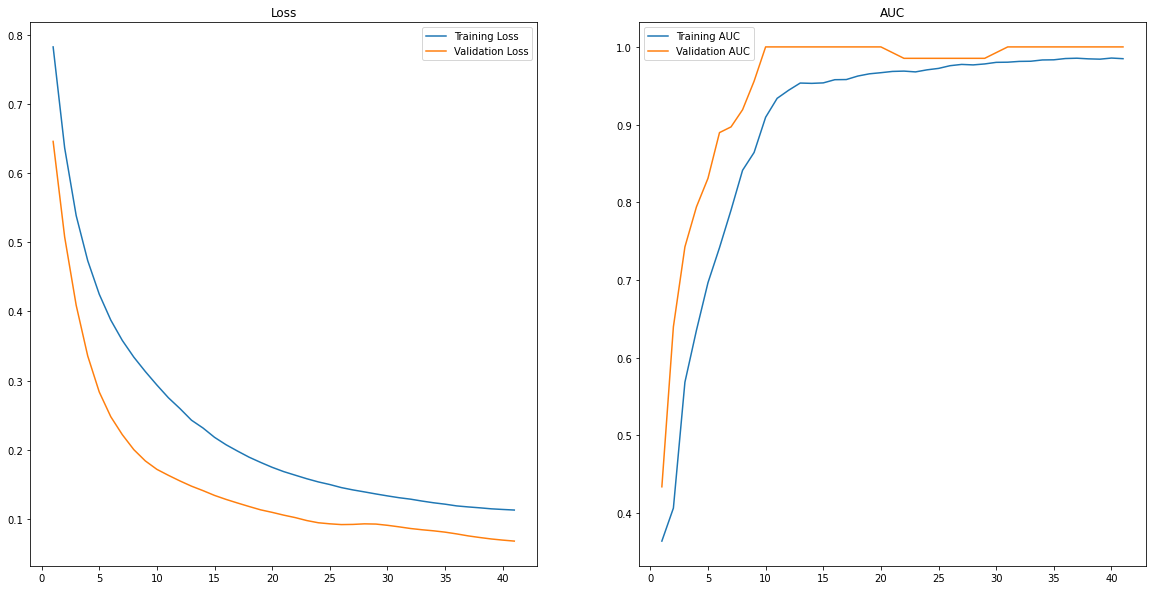

In [36]:
plt.figure(figsize=(20,10))

epochs_range = range(1, epochs+1)
train_loss,val_loss = history.history['loss'], history.history['val_loss']
train_auc,val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss, label ='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_auc, label ='Training AUC')
plt.plot(epochs_range, val_auc, label ='Validation AUC')
plt.title('AUC')
plt.legend()

plt.show()

In [38]:
print(np.argmin(val_loss), np.argmax(val_auc))

40 9


In [40]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8571 - auc: 0.6561


[0.40175628662109375, 0.8571428656578064, 0.6561224460601807]

In [41]:
len(y_test)

77

In [42]:
X_food.shape


(255, 405)

In [43]:
food_model = build_model(405, hidden_layer_sizes=(128, 128))

food_batch_size = 64
food_epochs = 200

food_history = food_model.fit(
    X_food_train,
    y_food_train,
    validation_split=0.2,
    batch_size=food_batch_size,
    epochs=food_epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

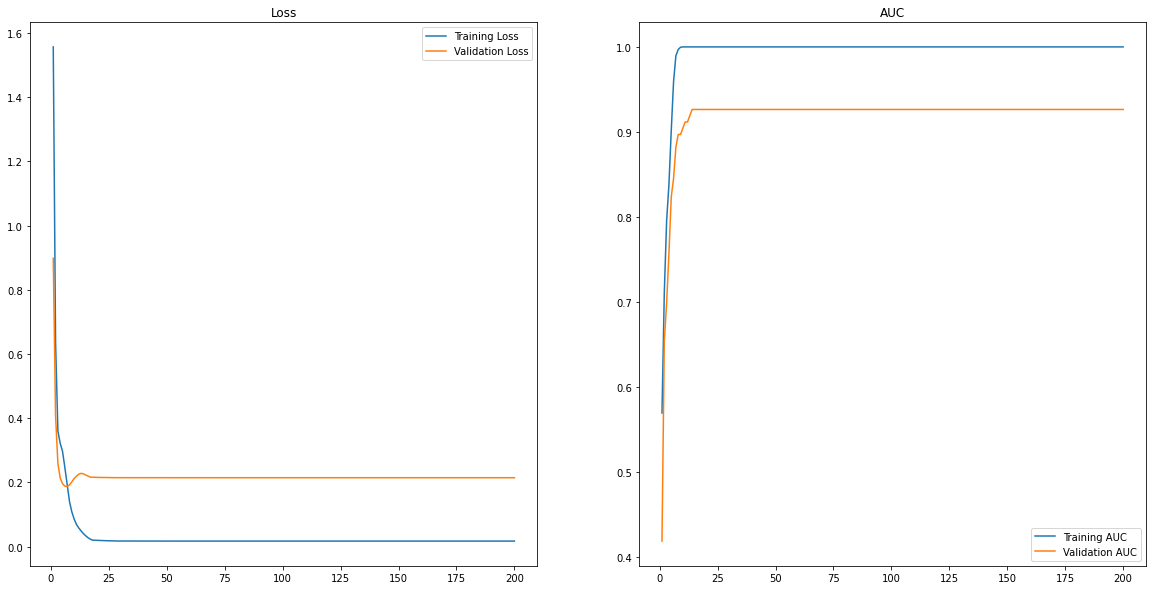

In [44]:
plt.figure(figsize=(20, 10))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(food_epochs_range, food_train_loss, label="Training Loss")
plt.plot(food_epochs_range, food_val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(food_epochs_range, food_train_auc, label="Training AUC")
plt.plot(food_epochs_range, food_val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()


In [45]:
print(np.argmin(food_val_loss), np.argmax(food_val_auc))


6 13


In [46]:
food_model.evaluate(X_food_test, y_food_test)


3/3 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8831 - auc: 0.6643


[0.3443707227706909, 0.8831169009208679, 0.6642857193946838]

In [47]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

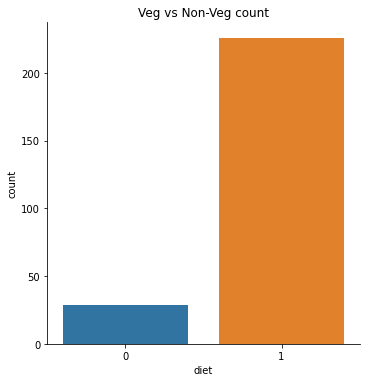

In [50]:
plot = sns.catplot(x = 'diet' , kind = 'count', data=data)
plot.set(title = 'Veg vs Non-Veg count')
plt.show()

In [ ]:
temp = pd.crosstab(df['state'].df['diet'])
veg_states_data = 